In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys1 = ct.ss([[-1, 1], [-10, -1]], np.zeros(2), np.eye(2), 0) # A1 
sys2 = ct.ss([[-1, 10], [-1, -1]], np.zeros(2), np.eye(2), 0) # A2

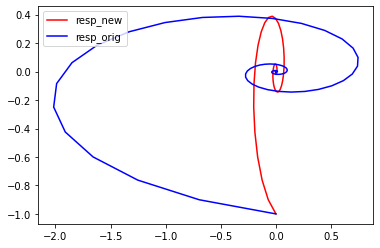

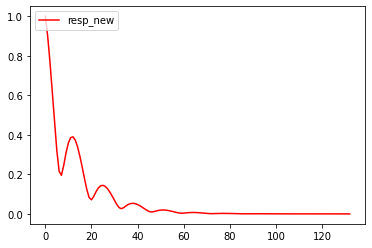

In [3]:
resp1 = ct.initial_response(sys1, 10, [0, -1])
t = []
resp1_mag = []
for i in range(len(resp1.states[0])):
    t.append(i)
    resp1_mag.append(np.linalg.norm(np.array([resp1.states[0,i], resp1.states[1,i]])))
    
plt.plot(resp1.states[0], resp1.states[1], "-r", label="resp_new")

resp2 = ct.initial_response(sys2, 10, [0, -1])
plt.plot(resp2.states[0], resp2.states[1], "-b", label="resp_orig")
plt.legend(loc="upper left")

fig2, ax2 = plt.subplots()
ax2.plot(t, resp1_mag, 'r',label="resp_new")
plt.legend(loc="upper left")


# plt.axis('equal')

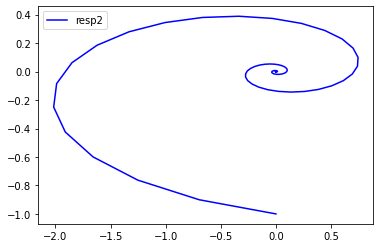

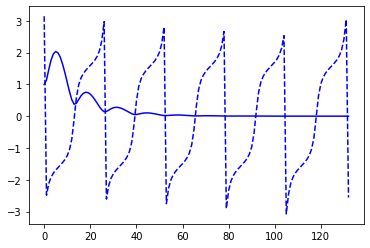

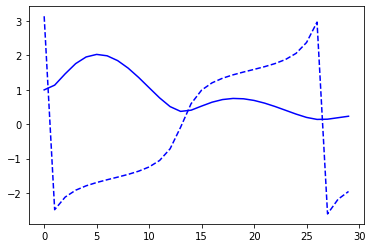

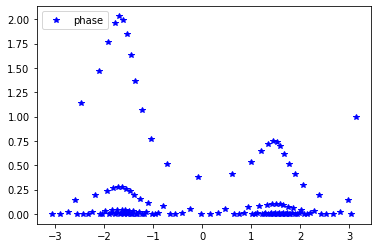

In [5]:
# Plot magnitude:
resp2 = ct.initial_response(sys2, 10, [0, -1])
plt.plot(resp2.states[0], resp2.states[1], "-b", label="resp2")


plt.legend(loc="upper left")

t = []

resp2_mag = []
resp2a_mag = []


resp2_phase = []
resp2_phase_atan = []

for i in range(len(resp2.states[0])):
    t.append(i)
    resp2_mag.append(np.linalg.norm(np.array([resp2.states[0,i], resp2.states[1,i]])))
    resp2_phase.append(np.arctan(resp2.states[0,i]/resp2.states[1,i]))
    resp2_phase_atan.append(np.arctan2(resp2.states[0,i], resp2.states[1,i]))


fig4, ax4 = plt.subplots()
ax4.plot(t, resp2_phase_atan, 'b--', label="phase")
ax4.plot(t, resp2_mag, 'b', label="mag")

fig5, ax5 = plt.subplots()
ax5.plot(t[0:30], resp2_phase_atan[0:30], 'b--', label="phase")
ax5.plot(t[0:30], resp2_mag[0:30], 'b', label="mag")

fig6, ax6 = plt.subplots()
ax6.plot(resp2_phase_atan, resp2_mag, '*b', label="phase")

plt.legend(loc="upper left")

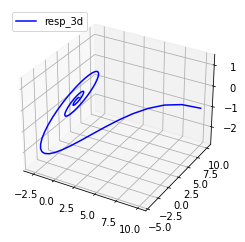

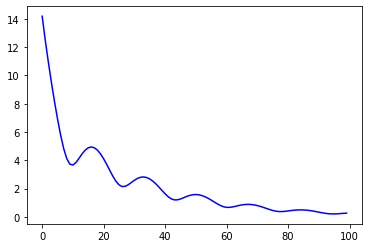

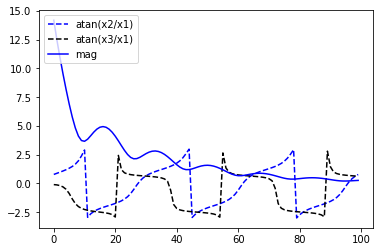

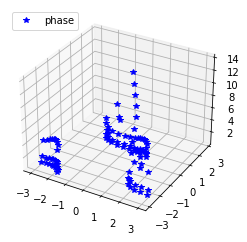

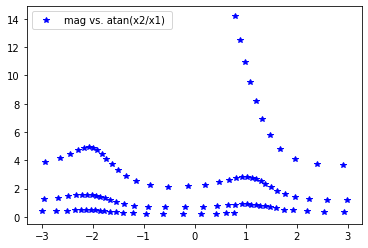

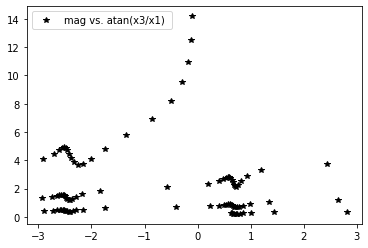

In [42]:
# 3D example:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

sys_3d= ct.ss([[-1, -1, 2], [1, -1, 3], [1, -1, -1]], np.zeros(3), np.array([1,1,1]), 0) # A2
resp_3d = ct.initial_response(sys_3d, 10, [10, 10, -1])

ax.plot(resp_3d.states[0], resp_3d.states[1], resp_3d.states[2], "-b", label="resp_3d")


plt.legend(loc="upper left")

t1 = []

resp_3d_mag = []
resp_3d_phase1 = []
resp_3d_phase_atan1 = []
resp_3d_phase2 = []
resp_3d_phase_atan2 = []


for i in range(len(resp_3d.states[0])):
    t1.append(i)
    resp_3d_mag.append(np.linalg.norm(np.array([resp_3d.states[0,i], resp_3d.states[1,i], resp_3d.states[2,i]])))
    resp_3d_phase1.append(np.arctan(resp_3d.states[1,i]/resp_3d.states[0,i]))
    resp_3d_phase_atan1.append(np.arctan2(resp_3d.states[1,i], resp_3d.states[0,i]))
    resp_3d_phase2.append(np.arctan(resp_3d.states[2,i]/resp_3d.states[0,i]))
    resp_3d_phase_atan2.append(np.arctan2(resp_3d.states[2,i], resp_3d.states[0,i]))
    


fig4, ax4 = plt.subplots()
ax4.plot(t1, resp_3d_mag, 'b', label="mag")

fig5, ax5 = plt.subplots()
ax5.plot(t1, resp_3d_phase_atan1, 'b--', label="atan(x2/x1)")
ax5.plot(t1, resp_3d_phase_atan2, 'k--', label="atan(x3/x1)")
ax5.plot(t1, resp_3d_mag, 'b', label="mag")
plt.legend(loc="upper left")

fig6 = plt.figure()
ax6 = fig6.add_subplot(projection='3d')
ax6.plot(resp_3d_phase_atan1, resp_3d_phase_atan2, resp_3d_mag, '*b', label="phase")

plt.legend(loc="upper left")

fig7, ax7 = plt.subplots()
ax7.plot(resp_3d_phase_atan1,  resp_3d_mag, '*b', label="mag vs. atan(x2/x1) ")
plt.legend(loc="upper left")


fig8, ax8 = plt.subplots()
ax8.plot(resp_3d_phase_atan2,  resp_3d_mag, '*k', label="mag vs. atan(x3/x1) ")
plt.legend(loc="upper left")



In [9]:
t1

[]

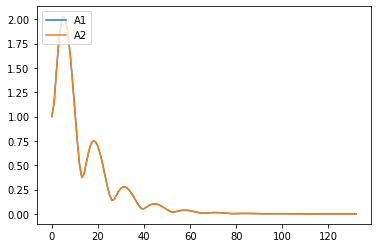

In [6]:
t = []
resp1_mag = []
resp2_mag = []
for i in range(len(resp1.states[0])):
    t.append(i)
    resp1_mag.append(np.linalg.norm(np.array([resp1.states[0,i], resp1.states[1,i]])))
    resp2_mag.append(np.linalg.norm(np.array([resp2.states[0,i], resp2.states[1,i]])))
    
fig2, ax2 = plt.subplots()
ax2.plot(t, resp1_mag, label="A1")
ax2.plot(t, resp2_mag, label="A2")
plt.legend(loc="upper left")

In [7]:
# Construct a composite system
def switched_update(t, x, u, p):
    if x[0] > 0 and x[1] < 0:
        return sys1.A @ x
    elif x[0] <= 0 and x[1] < 0:
        return sys2.A @ x
    elif x[0] > 0 and x[1] <= 0:
        return sys1.A @ x
    else:
        return sys2.A @ x
    
sys = ct.NonlinearIOSystem(switched_update, None, states=2, inputs=0, outputs=2)

[ 0.42781015 -0.43900047]


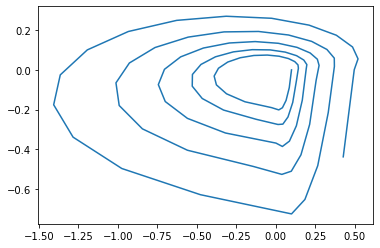

In [8]:
# Simulate
resp = ct.input_output_response(sys, np.linspace(0, 10, 100), 0, [0.1, 0])
plt.plot(resp.states[0], resp.states[1])
print(resp.states[:, -1])

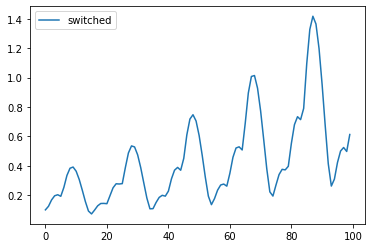

In [9]:
t = []
resp_mag = []
for i in range(len(resp.states[0])):
    t.append(i)
    resp_mag.append(np.linalg.norm(np.array([resp.states[0,i], resp.states[1,i]])))
    
fig3, ax3 = plt.subplots()
ax3.plot(t, resp_mag, label="switched")
plt.legend(loc="upper left")